# **Income prediction model**
-----------------------------------------------------------------------------------

# **Objective**
The objective of the project is to develop a model that Predict whether income exceeds 50K/yr based on census data. With the income Prediction project, we aim to create a dependable machine learning model that can forecast income exceeds $50K/yr with accuracy and precision. We'll examine a vast collection of diverse samples by analyzing multiple physicochemical properties combined with sensory attributes. Our model's output provides a credible appraisal for analyzing or selecting datasets in making more informed decision-making choices regarding production and selection processes specifically catered towards their needs. Our ultimate target involves developing an innovative predictive tool equipped with features for effective evaluation & enhancement thereby uplifting and raising industry standards for competitiveness.

# **Data Source**
The data for this project can be obtained from the following source:
Data Source: [link text](https://github.com/21P31A05A5/dataset/raw/main/Income_prediction-adult.csv)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv('https://github.com/21P31A05A5/dataset/raw/main/Income_prediction-adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Describe Data**

In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [9]:
df['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [10]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [11]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

# Dropping Education

In [13]:
df = df.drop(['education', 'fnlwgt'], axis = 1)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Replacing ? with NaN

In [14]:
df.replace('?', np.NaN,inplace = True)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Replacing NaN with Forward Fill

In [15]:
df.fillna(method = 'ffill', inplace = True)

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


# **Data Visulaization**

<Axes: xlabel='income', ylabel='age'>

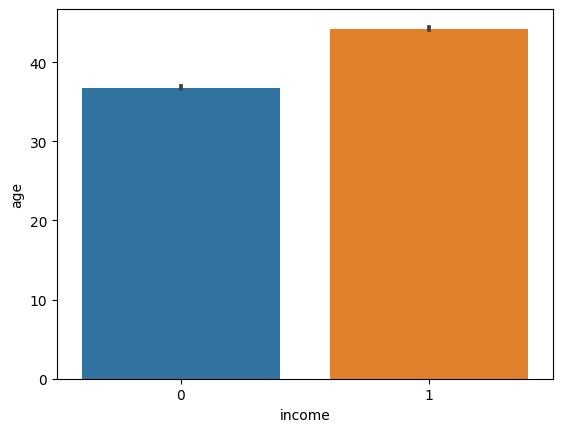

In [17]:
sns.barplot(x = 'income', y = 'age', data = df)

<Axes: >

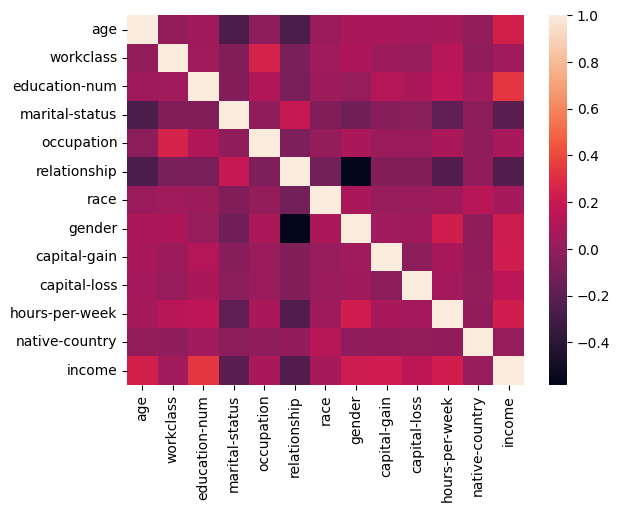

In [18]:
sns.heatmap(df.corr())

# **Define Target Variable (y) and Feature Variables (X)**

In [19]:
x = df.drop(['income'], axis = 1)
y = df['income']

# **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=40)

# **Modeling**

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model = rfc.fit(x_train, y_train)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Model Evaluation**

In [23]:
prediction = model.predict(x_test)

# **Printing Metrics**

In [24]:
print("Acc on training data: {:,.3f}".format(rfc.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(x_test, y_test)))

Acc on training data: 0.980
Acc on test data: 0.849


In [25]:
print(confusion_matrix(y_test, prediction))

[[6824  573]
 [ 902 1470]]


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7397
           1       0.72      0.62      0.67      2372

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



# Accuracy Score

In [27]:
print(accuracy_score(y_test,prediction)*100)

84.90121813901116


# **Explaination**


1. **Import Library:** This step imports the necessary libraries that will be used throughout the project, such as pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, and scikit-learn for machine learning tasks.

2. **Load the Data:** This step reads the dataset from the provided URL using pandas' read_csv() function and stores it in the variable data.

3. **Describe Data:** This step provides an overview of the dataset. data.head() displays the first few rows of the dataset, data.info() provides information about the columns and data types, and data.describe() gives a statistical summary of the dataset, including count, mean, standard deviation, minimum, and maximum values.

4. **Data Preprocessing:** This step involves handling missing values and categorical variables. The example shows two common preprocessing tasks. First, dropna() is used to remove rows with missing values. Second, pd.get_dummies() is used to convert categorical variables into binary dummy variables, dropping the first category to avoid multicollinearity.

5. **Data Visualization:** This step involves visualizing the data to gain insights and understand its distribution. The example provided plots a barplot of the 'Age' and 'Income' column using matplotlib, which helps visualize the age distribution of the customers.


6. **Define Target Variable (y) and Feature Variables (X):** This step separates the dataset into the target variable (dependent variable) and feature variables (independent variables). The example assigns all columns except 'Exited' to X, and 'Exited' column to y.

7. **Train Test Split:** This step splits the data into training and testing datasets. The example uses train_test_split() function from scikit-learn to randomly split the data into training and testing sets, with a test size of 20% of the total dataset.

8. **Modeling:** This step involves building a machine learning model on the training data. The example uses random-forest from scikit-learn as the modeling technique. It also includes data scaling using StandardScaler() to standardize the numerical features before training the model.

9. **Model Evaluation:** This step evaluates the trained model using evaluation metrics. The example shows how to calculate the confusion matrix and accuracy score for the predicted values (prediction) compared to the actual values (y_test).

10. **Accuracy score:** This step demonstrates how to use the trained model to find accuracy of the model on given dataset.Then, it uses the trained model to predict the income exceeds $50K/yr or not for the new data.